In [2]:

# 넘파이를 이용한  MLP 구현

import numpy as np
# 시그모이드 함수
def actf(x):
    return 1/(1+np.exp(-x))

# 시그모이드 함수의 미분치
def actf_deriv(x):
    return x*(1-x)

# 입력유닛의 개수, 은닉유닛의 개수, 출력유닛의 개수
inputs, hiddens, outputs = 2, 2, 1
learning_rate=0.2

# 훈련 샘플과 정답
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
T = np.array([[1], [0], [0], [1]])


In [3]:

# 순방향 전파 구현

W1 = np.array([[0.10,0.20], [0.30,0.40]])
W2 = np.array([[0.50],[0.60]])
B1 = np.array([0.1, 0.2])
B2 = np.array([0.3])

# 순방향 전파 계산
def predict(x):
    layer0 = x # 입력을 layer0에 대입한다.
    Z1 = np.dot(layer0, W1)+B1 # 행렬의 곱을 계산한다.
    layer1 = actf(Z1) # 활성화 함수를 적용한다.
    Z2 = np.dot(layer1, W2)+B2 # 행렬의 곱을 계산한다.
    layer2 = actf(Z2) # 활성화 함수를 적용한다.
    return layer0, layer1, layer2


In [5]:
# 역방향 전파 계산
def fit():
    global W1, W2, B1, B2 # 우리는 외부에 정의된 변수를 변경해야 한다.
    for i in range(90000): # 9만번 반복한다.
        for x, y in zip(X, T): # 학습 샘플을 하나씩 꺼낸다.
            x = np.reshape(x, (1, -1)) # 2차원 행렬로 만든다. ①
            y = np.reshape(y, (1, -1)) # 2차원 행렬로 만든다.
            
            layer0, layer1, layer2 = predict(x) # 순방향 계산
            layer2_error = layer2-y # 오차 계산
            layer2_delta = layer2_error*actf_deriv(layer2) # 출력층의 델타 계산
            layer1_error = np.dot(layer2_delta, W2.T) # 은닉층의 오차 계산 ②
            layer1_delta = layer1_error*actf_deriv(layer1) # 은닉층의 델타 계산 ③
            
            W2 += -learning_rate*np.dot(layer1.T, layer2_delta) # ④
            W1 += -learning_rate*np.dot(layer0.T, layer1_delta) #
            B2 += -learning_rate*np.sum(layer2_delta, axis=0) # ⑤
            B1 += -learning_rate*np.sum(layer1_delta, axis=0) 

In [6]:
def test():
    for x, y in zip(X, T):
        x = np.reshape(x, (1, -1)) # 하나의 샘플을 꺼내서 2차원 행렬로 만든다.
        layer0, layer1, layer2 = predict(x)
        print(x, y, layer2) # 출력층의 값을 출력해본다.
fit()
test()

[[0 0]] [1] [[0.99196032]]
[[0 1]] [0] [[0.00835708]]
[[1 0]] [0] [[0.00836107]]
[[1 1]] [1] [[0.98974873]]


In [9]:
#!pip install tensorflow

  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)


In [11]:
import tensorflow as tf

In [18]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=2, input_shape=(2,), activation='sigmoid')) 
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.SGD(lr=0.3))

import numpy as np
X= np.array([[0,0], [0,1], [0,1], [1,1]])
y = np.array([0,1,1,0])

model.fit(X, y, batch_size=1, epochs=10000)

print(model.predict(X))

Epoch 1/10000
4/4 [==============================] - 0s 3ms/step - loss: 0.2481
Epoch 2/10000
4/4 [==============================] - 0s 997us/step - loss: 0.2457
Epoch 3/10000
4/4 [==============================] - 0s 998us/step - loss: 0.2449
Epoch 4/10000
4/4 [==============================] - 0s 665us/step - loss: 0.2432
Epoch 5/10000
4/4 [==============================] - 0s 665us/step - loss: 0.2427
Epoch 6/10000
4/4 [==============================] - 0s 665us/step - loss: 0.2414
Epoch 7/10000
4/4 [==============================] - 0s 665us/step - loss: 0.2411
Epoch 8/10000
4/4 [==============================] - 0s 665us/step - loss: 0.2401
Epoch 9/10000
4/4 [==============================] - 0s 665us/step - loss: 0.2392
Epoch 10/10000
4/4 [==============================] - 0s 665us/step - loss: 0.2382
Epoch 11/10000
4/4 [==============================] - 0s 665us/step - loss: 0.2367
Epoch 12/10000
4/4 [==============================] - 0s 665us/step - loss: 0.2363
Epoch 13/10000


4/4 [==============================] - 0s 665us/step - loss: 0.0633
Epoch 100/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0620
Epoch 101/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0608
Epoch 102/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0596
Epoch 103/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0584
Epoch 104/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0572
Epoch 105/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0562
Epoch 106/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0551
Epoch 107/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0541
Epoch 108/10000
4/4 [==============================] - 0s 666us/step - loss: 0.0530
Epoch 109/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0520
Epoch 110/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0511
Epoch 11

4/4 [==============================] - 0s 665us/step - loss: 0.0158
Epoch 197/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0156
Epoch 198/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0155
Epoch 199/10000
4/4 [==============================] - 0s 663us/step - loss: 0.0153
Epoch 200/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0152
Epoch 201/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0151
Epoch 202/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0149
Epoch 203/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0148
Epoch 204/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0146
Epoch 205/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0145
Epoch 206/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0144
Epoch 207/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0142
Epoch 20

4/4 [==============================] - 0s 665us/step - loss: 0.0077
Epoch 294/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0076
Epoch 295/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0076
Epoch 296/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0075
Epoch 297/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0075
Epoch 298/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0075
Epoch 299/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0074
Epoch 300/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0074
Epoch 301/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0073
Epoch 302/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0073
Epoch 303/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0073
Epoch 304/10000
4/4 [==============================] - 0s 332us/step - loss: 0.0072
Epoch 30

4/4 [==============================] - 0s 665us/step - loss: 0.0048
Epoch 391/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0048
Epoch 392/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0048
Epoch 393/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0048
Epoch 394/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0048
Epoch 395/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0047
Epoch 396/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0047
Epoch 397/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0047
Epoch 398/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0047
Epoch 399/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0047
Epoch 400/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0046
Epoch 401/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0046
Epoch 40

4/4 [==============================] - 0s 665us/step - loss: 0.0034
Epoch 488/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0034
Epoch 489/10000
4/4 [==============================] - 0s 332us/step - loss: 0.0034
Epoch 490/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0034
Epoch 491/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0034
Epoch 492/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0034
Epoch 493/10000
4/4 [==============================] - 0s 664us/step - loss: 0.0034
Epoch 494/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0034
Epoch 495/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0034
Epoch 496/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0034
Epoch 497/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0033
Epoch 498/10000
4/4 [==============================] - 0s 664us/step - loss: 0.0033
Epoch 49

4/4 [==============================] - 0s 665us/step - loss: 0.0027
Epoch 585/10000
4/4 [==============================] - 0s 997us/step - loss: 0.0026
Epoch 586/10000
4/4 [==============================] - 0s 997us/step - loss: 0.0026
Epoch 587/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0026
Epoch 588/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0026
Epoch 589/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0026
Epoch 590/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0026
Epoch 591/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0026
Epoch 592/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0026
Epoch 593/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0026
Epoch 594/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0026
Epoch 595/10000
4/4 [==============================] - 0s 998us/step - loss: 0.0026
Epoch 59

4/4 [==============================] - 0s 333us/step - loss: 0.0021
Epoch 682/10000
4/4 [==============================] - 0s 332us/step - loss: 0.0021
Epoch 683/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0021
Epoch 684/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0021
Epoch 685/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0021
Epoch 686/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0021
Epoch 687/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0021
Epoch 688/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0021
Epoch 689/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0021
Epoch 690/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0021
Epoch 691/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0021
Epoch 692/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0021
Epoch 69

4/4 [==============================] - 0s 665us/step - loss: 0.0018
Epoch 779/10000
4/4 [==============================] - 0s 998us/step - loss: 0.0018
Epoch 780/10000
4/4 [==============================] - 0s 997us/step - loss: 0.0018
Epoch 781/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0018
Epoch 782/10000
4/4 [==============================] - 0s 332us/step - loss: 0.0018
Epoch 783/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0018
Epoch 784/10000
4/4 [==============================] - 0s 332us/step - loss: 0.0018
Epoch 785/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0018
Epoch 786/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0018
Epoch 787/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0018
Epoch 788/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0018
Epoch 789/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0018
Epoch 79

4/4 [==============================] - 0s 665us/step - loss: 0.0015
Epoch 876/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0015
Epoch 877/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0015
Epoch 878/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0015
Epoch 879/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0015
Epoch 880/10000
4/4 [==============================] - 0s 332us/step - loss: 0.0015
Epoch 881/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0015
Epoch 882/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0015
Epoch 883/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0015
Epoch 884/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0015
Epoch 885/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0015
Epoch 886/10000
4/4 [==============================] - 0s 655us/step - loss: 0.0015
Epoch 88

4/4 [==============================] - 0s 665us/step - loss: 0.0013
Epoch 973/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0013
Epoch 974/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0013
Epoch 975/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0013
Epoch 976/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0013
Epoch 977/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0013
Epoch 978/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0013
Epoch 979/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0013
Epoch 980/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0013
Epoch 981/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0013
Epoch 982/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0013
Epoch 983/10000
4/4 [==============================] - 0s 333us/step - loss: 0.0013
Epoch 98

Epoch 1069/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0012
Epoch 1070/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0012
Epoch 1071/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0012
Epoch 1072/10000
4/4 [==============================] - 0s 998us/step - loss: 0.0012
Epoch 1073/10000
4/4 [==============================] - 0s 664us/step - loss: 0.0012
Epoch 1074/10000
4/4 [==============================] - 0s 332us/step - loss: 0.0012
Epoch 1075/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0012
Epoch 1076/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0012
Epoch 1077/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0012
Epoch 1078/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0012
Epoch 1079/10000
4/4 [==============================] - 0s 661us/step - loss: 0.0012
Epoch 1080/10000
4/4 [==============================] - 0s 665us/

4/4 [==============================] - 0s 665us/step - loss: 0.0011
Epoch 1166/10000
4/4 [==============================] - 0s 332us/step - loss: 0.0011
Epoch 1167/10000
4/4 [==============================] - 0s 332us/step - loss: 0.0011
Epoch 1168/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0011
Epoch 1169/10000
4/4 [==============================] - 0s 664us/step - loss: 0.0011
Epoch 1170/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0011
Epoch 1171/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0011
Epoch 1172/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0010
Epoch 1173/10000
4/4 [==============================] - 0s 665us/step - loss: 0.0010
Epoch 1174/10000
4/4 [==============================] - 0s 662us/step - loss: 0.0010
Epoch 1175/10000
4/4 [==============================] - 0s 998us/step - loss: 0.0010
Epoch 1176/10000
4/4 [==============================] - 0s 998us/step - loss: 0.00

4/4 [==============================] - 0s 665us/step - loss: 9.5954e-04
Epoch 1260/10000
4/4 [==============================] - 0s 665us/step - loss: 9.5858e-04
Epoch 1261/10000
4/4 [==============================] - 0s 665us/step - loss: 9.5763e-04
Epoch 1262/10000
4/4 [==============================] - 0s 667us/step - loss: 9.5668e-04
Epoch 1263/10000
4/4 [==============================] - 0s 665us/step - loss: 9.5574e-04
Epoch 1264/10000
4/4 [==============================] - 0s 665us/step - loss: 9.5480e-04
Epoch 1265/10000
4/4 [==============================] - 0s 333us/step - loss: 9.5386e-04
Epoch 1266/10000
4/4 [==============================] - 0s 665us/step - loss: 9.5292e-04
Epoch 1267/10000
4/4 [==============================] - 0s 665us/step - loss: 9.5198e-04
Epoch 1268/10000
4/4 [==============================] - 0s 998us/step - loss: 9.5104e-04
Epoch 1269/10000
4/4 [==============================] - 0s 997us/step - loss: 9.5011e-04
Epoch 1270/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 8.7897e-04
Epoch 1352/10000
4/4 [==============================] - 0s 665us/step - loss: 8.7817e-04
Epoch 1353/10000
4/4 [==============================] - 0s 665us/step - loss: 8.7737e-04
Epoch 1354/10000
4/4 [==============================] - 0s 665us/step - loss: 8.7656e-04
Epoch 1355/10000
4/4 [==============================] - 0s 332us/step - loss: 8.7576e-04
Epoch 1356/10000
4/4 [==============================] - 0s 665us/step - loss: 8.7497e-04
Epoch 1357/10000
4/4 [==============================] - 0s 665us/step - loss: 8.7417e-04
Epoch 1358/10000
4/4 [==============================] - 0s 665us/step - loss: 8.7337e-04
Epoch 1359/10000
4/4 [==============================] - 0s 665us/step - loss: 8.7258e-04
Epoch 1360/10000
4/4 [==============================] - 0s 665us/step - loss: 8.7178e-04
Epoch 1361/10000
4/4 [==============================] - 0s 665us/step - loss: 8.7099e-04
Epoch 1362/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 8.1038e-04
Epoch 1444/10000
4/4 [==============================] - 0s 660us/step - loss: 8.0969e-04
Epoch 1445/10000
4/4 [==============================] - 0s 665us/step - loss: 8.0901e-04
Epoch 1446/10000
4/4 [==============================] - 0s 659us/step - loss: 8.0832e-04
Epoch 1447/10000
4/4 [==============================] - 0s 665us/step - loss: 8.0763e-04
Epoch 1448/10000
4/4 [==============================] - 0s 665us/step - loss: 8.0694e-04
Epoch 1449/10000
4/4 [==============================] - 0s 665us/step - loss: 8.0626e-04
Epoch 1450/10000
4/4 [==============================] - 0s 665us/step - loss: 8.0558e-04
Epoch 1451/10000
4/4 [==============================] - 0s 333us/step - loss: 8.0490e-04
Epoch 1452/10000
4/4 [==============================] - 0s 665us/step - loss: 8.0421e-04
Epoch 1453/10000
4/4 [==============================] - 0s 665us/step - loss: 8.0353e-04
Epoch 1454/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 7.5132e-04
Epoch 1536/10000
4/4 [==============================] - 0s 665us/step - loss: 7.5072e-04
Epoch 1537/10000
4/4 [==============================] - 0s 665us/step - loss: 7.5012e-04
Epoch 1538/10000
4/4 [==============================] - 0s 332us/step - loss: 7.4953e-04
Epoch 1539/10000
4/4 [==============================] - 0s 333us/step - loss: 7.4893e-04
Epoch 1540/10000
4/4 [==============================] - 0s 665us/step - loss: 7.4834e-04
Epoch 1541/10000
4/4 [==============================] - 0s 665us/step - loss: 7.4775e-04
Epoch 1542/10000
4/4 [==============================] - 0s 665us/step - loss: 7.4716e-04
Epoch 1543/10000
4/4 [==============================] - 0s 665us/step - loss: 7.4657e-04
Epoch 1544/10000
4/4 [==============================] - 0s 665us/step - loss: 7.4597e-04
Epoch 1545/10000
4/4 [==============================] - 0s 332us/step - loss: 7.4539e-04
Epoch 1546/10000
4/4 [================

4/4 [==============================] - 0s 801us/step - loss: 6.9995e-04
Epoch 1628/10000
4/4 [==============================] - 0s 665us/step - loss: 6.9943e-04
Epoch 1629/10000
4/4 [==============================] - 0s 332us/step - loss: 6.9891e-04
Epoch 1630/10000
4/4 [==============================] - 0s 665us/step - loss: 6.9839e-04
Epoch 1631/10000
4/4 [==============================] - 0s 663us/step - loss: 6.9787e-04
Epoch 1632/10000
4/4 [==============================] - 0s 998us/step - loss: 6.9735e-04
Epoch 1633/10000
4/4 [==============================] - 0s 665us/step - loss: 6.9683e-04
Epoch 1634/10000
4/4 [==============================] - 0s 665us/step - loss: 6.9631e-04
Epoch 1635/10000
4/4 [==============================] - 0s 997us/step - loss: 6.9580e-04
Epoch 1636/10000
4/4 [==============================] - 0s 665us/step - loss: 6.9528e-04
Epoch 1637/10000
4/4 [==============================] - 0s 665us/step - loss: 6.9477e-04
Epoch 1638/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 6.5490e-04
Epoch 1720/10000
4/4 [==============================] - 0s 665us/step - loss: 6.5444e-04
Epoch 1721/10000
4/4 [==============================] - 0s 333us/step - loss: 6.5398e-04
Epoch 1722/10000
4/4 [==============================] - 0s 664us/step - loss: 6.5352e-04
Epoch 1723/10000
4/4 [==============================] - 0s 665us/step - loss: 6.5307e-04
Epoch 1724/10000
4/4 [==============================] - 0s 665us/step - loss: 6.5261e-04
Epoch 1725/10000
4/4 [==============================] - 0s 332us/step - loss: 6.5215e-04
Epoch 1726/10000
4/4 [==============================] - 0s 664us/step - loss: 6.5170e-04
Epoch 1727/10000
4/4 [==============================] - 0s 665us/step - loss: 6.5124e-04
Epoch 1728/10000
4/4 [==============================] - 0s 332us/step - loss: 6.5079e-04
Epoch 1729/10000
4/4 [==============================] - 0s 665us/step - loss: 6.5033e-04
Epoch 1730/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 6.1508e-04
Epoch 1812/10000
4/4 [==============================] - 0s 665us/step - loss: 6.1467e-04
Epoch 1813/10000
4/4 [==============================] - 0s 665us/step - loss: 6.1426e-04
Epoch 1814/10000
4/4 [==============================] - 0s 665us/step - loss: 6.1386e-04
Epoch 1815/10000
4/4 [==============================] - 0s 332us/step - loss: 6.1345e-04
Epoch 1816/10000
4/4 [==============================] - 0s 659us/step - loss: 6.1304e-04
Epoch 1817/10000
4/4 [==============================] - 0s 333us/step - loss: 6.1264e-04
Epoch 1818/10000
4/4 [==============================] - 0s 665us/step - loss: 6.1224e-04
Epoch 1819/10000
4/4 [==============================] - 0s 665us/step - loss: 6.1183e-04
Epoch 1820/10000
4/4 [==============================] - 0s 665us/step - loss: 6.1143e-04
Epoch 1821/10000
4/4 [==============================] - 0s 665us/step - loss: 6.1103e-04
Epoch 1822/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 5.7964e-04
Epoch 1904/10000
4/4 [==============================] - 0s 665us/step - loss: 5.7927e-04
Epoch 1905/10000
4/4 [==============================] - 0s 665us/step - loss: 5.7891e-04
Epoch 1906/10000
4/4 [==============================] - 0s 665us/step - loss: 5.7855e-04
Epoch 1907/10000
4/4 [==============================] - 0s 666us/step - loss: 5.7818e-04
Epoch 1908/10000
4/4 [==============================] - 0s 665us/step - loss: 5.7782e-04
Epoch 1909/10000
4/4 [==============================] - 0s 665us/step - loss: 5.7746e-04
Epoch 1910/10000
4/4 [==============================] - 0s 665us/step - loss: 5.7710e-04
Epoch 1911/10000
4/4 [==============================] - 0s 665us/step - loss: 5.7674e-04
Epoch 1912/10000
4/4 [==============================] - 0s 997us/step - loss: 5.7638e-04
Epoch 1913/10000
4/4 [==============================] - 0s 665us/step - loss: 5.7602e-04
Epoch 1914/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 5.4791e-04
Epoch 1996/10000
4/4 [==============================] - 0s 665us/step - loss: 5.4759e-04
Epoch 1997/10000
4/4 [==============================] - 0s 665us/step - loss: 5.4726e-04
Epoch 1998/10000
4/4 [==============================] - 0s 1ms/step - loss: 5.4694e-04
Epoch 1999/10000
4/4 [==============================] - 0s 664us/step - loss: 5.4661e-04
Epoch 2000/10000
4/4 [==============================] - 0s 665us/step - loss: 5.4628e-04
Epoch 2001/10000
4/4 [==============================] - 0s 333us/step - loss: 5.4596e-04
Epoch 2002/10000
4/4 [==============================] - 0s 665us/step - loss: 5.4564e-04
Epoch 2003/10000
4/4 [==============================] - 0s 665us/step - loss: 5.4531e-04
Epoch 2004/10000
4/4 [==============================] - 0s 665us/step - loss: 5.4499e-04
Epoch 2005/10000
4/4 [==============================] - 0s 665us/step - loss: 5.4466e-04
Epoch 2006/10000
4/4 [==================

4/4 [==============================] - 0s 665us/step - loss: 5.1935e-04
Epoch 2088/10000
4/4 [==============================] - 0s 665us/step - loss: 5.1906e-04
Epoch 2089/10000
4/4 [==============================] - 0s 659us/step - loss: 5.1876e-04
Epoch 2090/10000
4/4 [==============================] - 0s 665us/step - loss: 5.1847e-04
Epoch 2091/10000
4/4 [==============================] - 0s 998us/step - loss: 5.1817e-04
Epoch 2092/10000
4/4 [==============================] - 0s 665us/step - loss: 5.1788e-04
Epoch 2093/10000
4/4 [==============================] - 0s 665us/step - loss: 5.1759e-04
Epoch 2094/10000
4/4 [==============================] - 0s 665us/step - loss: 5.1729e-04
Epoch 2095/10000
4/4 [==============================] - 0s 665us/step - loss: 5.1700e-04
Epoch 2096/10000
4/4 [==============================] - 0s 663us/step - loss: 5.1671e-04
Epoch 2097/10000
4/4 [==============================] - 0s 332us/step - loss: 5.1642e-04
Epoch 2098/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 4.9351e-04
Epoch 2180/10000
4/4 [==============================] - 0s 333us/step - loss: 4.9325e-04
Epoch 2181/10000
4/4 [==============================] - 0s 665us/step - loss: 4.9298e-04
Epoch 2182/10000
4/4 [==============================] - 0s 998us/step - loss: 4.9271e-04
Epoch 2183/10000
4/4 [==============================] - 0s 665us/step - loss: 4.9245e-04
Epoch 2184/10000
4/4 [==============================] - 0s 665us/step - loss: 4.9218e-04
Epoch 2185/10000
4/4 [==============================] - 0s 665us/step - loss: 4.9191e-04
Epoch 2186/10000
4/4 [==============================] - 0s 665us/step - loss: 4.9165e-04
Epoch 2187/10000
4/4 [==============================] - 0s 668us/step - loss: 4.9138e-04
Epoch 2188/10000
4/4 [==============================] - 0s 641us/step - loss: 4.9112e-04
Epoch 2189/10000
4/4 [==============================] - 0s 756us/step - loss: 4.9085e-04
Epoch 2190/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 4.7003e-04
Epoch 2272/10000
4/4 [==============================] - 0s 665us/step - loss: 4.6978e-04
Epoch 2273/10000
4/4 [==============================] - 0s 1ms/step - loss: 4.6954e-04
Epoch 2274/10000
4/4 [==============================] - 0s 665us/step - loss: 4.6930e-04
Epoch 2275/10000
4/4 [==============================] - 0s 333us/step - loss: 4.6906e-04
Epoch 2276/10000
4/4 [==============================] - 0s 665us/step - loss: 4.6881e-04
Epoch 2277/10000
4/4 [==============================] - 0s 333us/step - loss: 4.6857e-04
Epoch 2278/10000
4/4 [==============================] - 0s 665us/step - loss: 4.6833e-04
Epoch 2279/10000
4/4 [==============================] - 0s 665us/step - loss: 4.6809e-04
Epoch 2280/10000
4/4 [==============================] - 0s 665us/step - loss: 4.6785e-04
Epoch 2281/10000
4/4 [==============================] - 0s 665us/step - loss: 4.6761e-04
Epoch 2282/10000
4/4 [==================

4/4 [==============================] - 0s 664us/step - loss: 4.4860e-04
Epoch 2364/10000
4/4 [==============================] - 0s 665us/step - loss: 4.4838e-04
Epoch 2365/10000
4/4 [==============================] - 0s 665us/step - loss: 4.4815e-04
Epoch 2366/10000
4/4 [==============================] - 0s 665us/step - loss: 4.4793e-04
Epoch 2367/10000
4/4 [==============================] - 0s 664us/step - loss: 4.4771e-04
Epoch 2368/10000
4/4 [==============================] - 0s 665us/step - loss: 4.4749e-04
Epoch 2369/10000
4/4 [==============================] - 0s 665us/step - loss: 4.4727e-04
Epoch 2370/10000
4/4 [==============================] - 0s 665us/step - loss: 4.4705e-04
Epoch 2371/10000
4/4 [==============================] - 0s 665us/step - loss: 4.4683e-04
Epoch 2372/10000
4/4 [==============================] - 0s 665us/step - loss: 4.4660e-04
Epoch 2373/10000
4/4 [==============================] - 0s 333us/step - loss: 4.4638e-04
Epoch 2374/10000
4/4 [================

4/4 [==============================] - 0s 664us/step - loss: 4.2897e-04
Epoch 2456/10000
4/4 [==============================] - 0s 332us/step - loss: 4.2876e-04
Epoch 2457/10000
4/4 [==============================] - 0s 671us/step - loss: 4.2856e-04
Epoch 2458/10000
4/4 [==============================] - 0s 665us/step - loss: 4.2835e-04
Epoch 2459/10000
4/4 [==============================] - 0s 665us/step - loss: 4.2815e-04
Epoch 2460/10000
4/4 [==============================] - 0s 997us/step - loss: 4.2795e-04
Epoch 2461/10000
4/4 [==============================] - 0s 665us/step - loss: 4.2774e-04
Epoch 2462/10000
4/4 [==============================] - 0s 665us/step - loss: 4.2754e-04
Epoch 2463/10000
4/4 [==============================] - 0s 665us/step - loss: 4.2734e-04
Epoch 2464/10000
4/4 [==============================] - 0s 665us/step - loss: 4.2713e-04
Epoch 2465/10000
4/4 [==============================] - 0s 665us/step - loss: 4.2693e-04
Epoch 2466/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 4.1092e-04
Epoch 2548/10000
4/4 [==============================] - 0s 665us/step - loss: 4.1073e-04
Epoch 2549/10000
4/4 [==============================] - 0s 665us/step - loss: 4.1054e-04
Epoch 2550/10000
4/4 [==============================] - 0s 665us/step - loss: 4.1035e-04
Epoch 2551/10000
4/4 [==============================] - 0s 997us/step - loss: 4.1016e-04
Epoch 2552/10000
4/4 [==============================] - 0s 665us/step - loss: 4.0998e-04
Epoch 2553/10000
4/4 [==============================] - 0s 665us/step - loss: 4.0979e-04
Epoch 2554/10000
4/4 [==============================] - 0s 660us/step - loss: 4.0960e-04
Epoch 2555/10000
4/4 [==============================] - 0s 665us/step - loss: 4.0941e-04
Epoch 2556/10000
4/4 [==============================] - 0s 664us/step - loss: 4.0923e-04
Epoch 2557/10000
4/4 [==============================] - 0s 665us/step - loss: 4.0904e-04
Epoch 2558/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 3.9427e-04
Epoch 2640/10000
4/4 [==============================] - 0s 665us/step - loss: 3.9410e-04
Epoch 2641/10000
4/4 [==============================] - 0s 665us/step - loss: 3.9392e-04
Epoch 2642/10000
4/4 [==============================] - 0s 660us/step - loss: 3.9375e-04
Epoch 2643/10000
4/4 [==============================] - 0s 665us/step - loss: 3.9358e-04
Epoch 2644/10000
4/4 [==============================] - 0s 665us/step - loss: 3.9340e-04
Epoch 2645/10000
4/4 [==============================] - 0s 330us/step - loss: 3.9323e-04
Epoch 2646/10000
4/4 [==============================] - 0s 665us/step - loss: 3.9306e-04
Epoch 2647/10000
4/4 [==============================] - 0s 997us/step - loss: 3.9289e-04
Epoch 2648/10000
4/4 [==============================] - 0s 665us/step - loss: 3.9271e-04
Epoch 2649/10000
4/4 [==============================] - 0s 665us/step - loss: 3.9254e-04
Epoch 2650/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 3.7888e-04
Epoch 2732/10000
4/4 [==============================] - 0s 665us/step - loss: 3.7872e-04
Epoch 2733/10000
4/4 [==============================] - 0s 665us/step - loss: 3.7856e-04
Epoch 2734/10000
4/4 [==============================] - 0s 665us/step - loss: 3.7840e-04
Epoch 2735/10000
4/4 [==============================] - 0s 665us/step - loss: 3.7824e-04
Epoch 2736/10000
4/4 [==============================] - 0s 665us/step - loss: 3.7808e-04
Epoch 2737/10000
4/4 [==============================] - 0s 665us/step - loss: 3.7792e-04
Epoch 2738/10000
4/4 [==============================] - 0s 665us/step - loss: 3.7776e-04
Epoch 2739/10000
4/4 [==============================] - 0s 665us/step - loss: 3.7760e-04
Epoch 2740/10000
4/4 [==============================] - 0s 332us/step - loss: 3.7744e-04
Epoch 2741/10000
4/4 [==============================] - 0s 665us/step - loss: 3.7727e-04
Epoch 2742/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 3.6459e-04
Epoch 2824/10000
4/4 [==============================] - 0s 665us/step - loss: 3.6444e-04
Epoch 2825/10000
4/4 [==============================] - 0s 665us/step - loss: 3.6429e-04
Epoch 2826/10000
4/4 [==============================] - 0s 665us/step - loss: 3.6414e-04
Epoch 2827/10000
4/4 [==============================] - 0s 665us/step - loss: 3.6399e-04
Epoch 2828/10000
4/4 [==============================] - 0s 665us/step - loss: 3.6384e-04
Epoch 2829/10000
4/4 [==============================] - 0s 998us/step - loss: 3.6369e-04
Epoch 2830/10000
4/4 [==============================] - 0s 997us/step - loss: 3.6354e-04
Epoch 2831/10000
4/4 [==============================] - 0s 665us/step - loss: 3.6339e-04
Epoch 2832/10000
4/4 [==============================] - 0s 665us/step - loss: 3.6325e-04
Epoch 2833/10000
4/4 [==============================] - 0s 665us/step - loss: 3.6310e-04
Epoch 2834/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 3.5131e-04
Epoch 2916/10000
4/4 [==============================] - 0s 665us/step - loss: 3.5117e-04
Epoch 2917/10000
4/4 [==============================] - 0s 665us/step - loss: 3.5103e-04
Epoch 2918/10000
4/4 [==============================] - 0s 665us/step - loss: 3.5089e-04
Epoch 2919/10000
4/4 [==============================] - 0s 669us/step - loss: 3.5075e-04
Epoch 2920/10000
4/4 [==============================] - 0s 333us/step - loss: 3.5061e-04
Epoch 2921/10000
4/4 [==============================] - 0s 665us/step - loss: 3.5047e-04
Epoch 2922/10000
4/4 [==============================] - 0s 665us/step - loss: 3.5033e-04
Epoch 2923/10000
4/4 [==============================] - 0s 665us/step - loss: 3.5019e-04
Epoch 2924/10000
4/4 [==============================] - 0s 665us/step - loss: 3.5006e-04
Epoch 2925/10000
4/4 [==============================] - 0s 665us/step - loss: 3.4992e-04
Epoch 2926/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 3.3892e-04
Epoch 3008/10000
4/4 [==============================] - 0s 665us/step - loss: 3.3879e-04
Epoch 3009/10000
4/4 [==============================] - 0s 665us/step - loss: 3.3866e-04
Epoch 3010/10000
4/4 [==============================] - 0s 659us/step - loss: 3.3853e-04
Epoch 3011/10000
4/4 [==============================] - 0s 665us/step - loss: 3.3840e-04
Epoch 3012/10000
4/4 [==============================] - 0s 665us/step - loss: 3.3827e-04
Epoch 3013/10000
4/4 [==============================] - 0s 665us/step - loss: 3.3814e-04
Epoch 3014/10000
4/4 [==============================] - 0s 665us/step - loss: 3.3801e-04
Epoch 3015/10000
4/4 [==============================] - 0s 665us/step - loss: 3.3789e-04
Epoch 3016/10000
4/4 [==============================] - 0s 332us/step - loss: 3.3776e-04
Epoch 3017/10000
4/4 [==============================] - 0s 665us/step - loss: 3.3763e-04
Epoch 3018/10000
4/4 [================

4/4 [==============================] - 0s 664us/step - loss: 3.2735e-04
Epoch 3100/10000
4/4 [==============================] - 0s 665us/step - loss: 3.2723e-04
Epoch 3101/10000
4/4 [==============================] - 0s 665us/step - loss: 3.2711e-04
Epoch 3102/10000
4/4 [==============================] - 0s 665us/step - loss: 3.2699e-04
Epoch 3103/10000
4/4 [==============================] - 0s 665us/step - loss: 3.2686e-04
Epoch 3104/10000
4/4 [==============================] - 0s 332us/step - loss: 3.2674e-04
Epoch 3105/10000
4/4 [==============================] - 0s 665us/step - loss: 3.2662e-04
Epoch 3106/10000
4/4 [==============================] - 0s 665us/step - loss: 3.2650e-04
Epoch 3107/10000
4/4 [==============================] - 0s 663us/step - loss: 3.2638e-04
Epoch 3108/10000
4/4 [==============================] - 0s 665us/step - loss: 3.2626e-04
Epoch 3109/10000
4/4 [==============================] - 0s 665us/step - loss: 3.2614e-04
Epoch 3110/10000
4/4 [================

4/4 [==============================] - 0s 666us/step - loss: 3.1651e-04
Epoch 3192/10000
4/4 [==============================] - 0s 665us/step - loss: 3.1640e-04
Epoch 3193/10000
4/4 [==============================] - 0s 665us/step - loss: 3.1629e-04
Epoch 3194/10000
4/4 [==============================] - 0s 665us/step - loss: 3.1617e-04
Epoch 3195/10000
4/4 [==============================] - 0s 665us/step - loss: 3.1606e-04
Epoch 3196/10000
4/4 [==============================] - 0s 665us/step - loss: 3.1595e-04
Epoch 3197/10000
4/4 [==============================] - 0s 661us/step - loss: 3.1583e-04
Epoch 3198/10000
4/4 [==============================] - 0s 665us/step - loss: 3.1572e-04
Epoch 3199/10000
4/4 [==============================] - 0s 665us/step - loss: 3.1561e-04
Epoch 3200/10000
4/4 [==============================] - 0s 665us/step - loss: 3.1549e-04
Epoch 3201/10000
4/4 [==============================] - 0s 665us/step - loss: 3.1538e-04
Epoch 3202/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 3.0635e-04
Epoch 3284/10000
4/4 [==============================] - 0s 665us/step - loss: 3.0624e-04
Epoch 3285/10000
4/4 [==============================] - 0s 665us/step - loss: 3.0613e-04
Epoch 3286/10000
4/4 [==============================] - 0s 665us/step - loss: 3.0603e-04
Epoch 3287/10000
4/4 [==============================] - 0s 332us/step - loss: 3.0592e-04
Epoch 3288/10000
4/4 [==============================] - 0s 665us/step - loss: 3.0581e-04
Epoch 3289/10000
4/4 [==============================] - 0s 333us/step - loss: 3.0571e-04
Epoch 3290/10000
4/4 [==============================] - 0s 665us/step - loss: 3.0560e-04
Epoch 3291/10000
4/4 [==============================] - 0s 665us/step - loss: 3.0549e-04
Epoch 3292/10000
4/4 [==============================] - 0s 998us/step - loss: 3.0538e-04
Epoch 3293/10000
4/4 [==============================] - 0s 662us/step - loss: 3.0528e-04
Epoch 3294/10000
4/4 [================

4/4 [==============================] - 0s 664us/step - loss: 2.9679e-04
Epoch 3376/10000
4/4 [==============================] - 0s 328us/step - loss: 2.9669e-04
Epoch 3377/10000
4/4 [==============================] - 0s 665us/step - loss: 2.9659e-04
Epoch 3378/10000
4/4 [==============================] - 0s 665us/step - loss: 2.9649e-04
Epoch 3379/10000
4/4 [==============================] - 0s 665us/step - loss: 2.9638e-04
Epoch 3380/10000
4/4 [==============================] - 0s 665us/step - loss: 2.9628e-04
Epoch 3381/10000
4/4 [==============================] - 0s 665us/step - loss: 2.9618e-04
Epoch 3382/10000
4/4 [==============================] - 0s 665us/step - loss: 2.9608e-04
Epoch 3383/10000
4/4 [==============================] - 0s 332us/step - loss: 2.9598e-04
Epoch 3384/10000
4/4 [==============================] - 0s 665us/step - loss: 2.9588e-04
Epoch 3385/10000
4/4 [==============================] - 0s 665us/step - loss: 2.9578e-04
Epoch 3386/10000
4/4 [================

4/4 [==============================] - 0s 1ms/step - loss: 2.8779e-04
Epoch 3468/10000
4/4 [==============================] - 0s 665us/step - loss: 2.8770e-04
Epoch 3469/10000
4/4 [==============================] - 0s 665us/step - loss: 2.8760e-04
Epoch 3470/10000
4/4 [==============================] - 0s 665us/step - loss: 2.8751e-04
Epoch 3471/10000
4/4 [==============================] - 0s 665us/step - loss: 2.8741e-04
Epoch 3472/10000
4/4 [==============================] - 0s 332us/step - loss: 2.8732e-04
Epoch 3473/10000
4/4 [==============================] - 0s 665us/step - loss: 2.8722e-04
Epoch 3474/10000
4/4 [==============================] - 0s 665us/step - loss: 2.8713e-04
Epoch 3475/10000
4/4 [==============================] - 0s 665us/step - loss: 2.8703e-04
Epoch 3476/10000
4/4 [==============================] - 0s 665us/step - loss: 2.8694e-04
Epoch 3477/10000
4/4 [==============================] - 0s 665us/step - loss: 2.8684e-04
Epoch 3478/10000
4/4 [==================

4/4 [==============================] - 0s 665us/step - loss: 2.7930e-04
Epoch 3560/10000
4/4 [==============================] - 0s 332us/step - loss: 2.7921e-04
Epoch 3561/10000
4/4 [==============================] - 0s 665us/step - loss: 2.7912e-04
Epoch 3562/10000
4/4 [==============================] - 0s 660us/step - loss: 2.7903e-04
Epoch 3563/10000
4/4 [==============================] - 0s 665us/step - loss: 2.7894e-04
Epoch 3564/10000
4/4 [==============================] - 0s 665us/step - loss: 2.7885e-04
Epoch 3565/10000
4/4 [==============================] - 0s 332us/step - loss: 2.7876e-04
Epoch 3566/10000
4/4 [==============================] - 0s 665us/step - loss: 2.7867e-04
Epoch 3567/10000
4/4 [==============================] - 0s 665us/step - loss: 2.7858e-04
Epoch 3568/10000
4/4 [==============================] - 0s 665us/step - loss: 2.7849e-04
Epoch 3569/10000
4/4 [==============================] - 0s 665us/step - loss: 2.7840e-04
Epoch 3570/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 2.7128e-04
Epoch 3652/10000
4/4 [==============================] - 0s 665us/step - loss: 2.7119e-04
Epoch 3653/10000
4/4 [==============================] - 0s 332us/step - loss: 2.7111e-04
Epoch 3654/10000
4/4 [==============================] - 0s 333us/step - loss: 2.7102e-04
Epoch 3655/10000
4/4 [==============================] - 0s 665us/step - loss: 2.7094e-04
Epoch 3656/10000
4/4 [==============================] - 0s 664us/step - loss: 2.7086e-04
Epoch 3657/10000
4/4 [==============================] - 0s 665us/step - loss: 2.7077e-04
Epoch 3658/10000
4/4 [==============================] - 0s 665us/step - loss: 2.7069e-04
Epoch 3659/10000
4/4 [==============================] - 0s 333us/step - loss: 2.7060e-04
Epoch 3660/10000
4/4 [==============================] - 0s 665us/step - loss: 2.7052e-04
Epoch 3661/10000
4/4 [==============================] - 0s 665us/step - loss: 2.7043e-04
Epoch 3662/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 2.6369e-04
Epoch 3744/10000
4/4 [==============================] - 0s 665us/step - loss: 2.6361e-04
Epoch 3745/10000
4/4 [==============================] - 0s 665us/step - loss: 2.6353e-04
Epoch 3746/10000
4/4 [==============================] - 0s 665us/step - loss: 2.6345e-04
Epoch 3747/10000
4/4 [==============================] - 0s 664us/step - loss: 2.6337e-04
Epoch 3748/10000
4/4 [==============================] - 0s 665us/step - loss: 2.6329e-04
Epoch 3749/10000
4/4 [==============================] - 0s 333us/step - loss: 2.6321e-04
Epoch 3750/10000
4/4 [==============================] - 0s 665us/step - loss: 2.6313e-04
Epoch 3751/10000
4/4 [==============================] - 0s 665us/step - loss: 2.6305e-04
Epoch 3752/10000
4/4 [==============================] - 0s 665us/step - loss: 2.6297e-04
Epoch 3753/10000
4/4 [==============================] - 0s 998us/step - loss: 2.6289e-04
Epoch 3754/10000
4/4 [================

4/4 [==============================] - 0s 333us/step - loss: 2.5649e-04
Epoch 3836/10000
4/4 [==============================] - 0s 665us/step - loss: 2.5641e-04
Epoch 3837/10000
4/4 [==============================] - 0s 665us/step - loss: 2.5634e-04
Epoch 3838/10000
4/4 [==============================] - 0s 665us/step - loss: 2.5626e-04
Epoch 3839/10000
4/4 [==============================] - 0s 665us/step - loss: 2.5619e-04
Epoch 3840/10000
4/4 [==============================] - 0s 665us/step - loss: 2.5611e-04
Epoch 3841/10000
4/4 [==============================] - 0s 665us/step - loss: 2.5603e-04
Epoch 3842/10000
4/4 [==============================] - 0s 665us/step - loss: 2.5596e-04
Epoch 3843/10000
4/4 [==============================] - 0s 665us/step - loss: 2.5588e-04
Epoch 3844/10000
4/4 [==============================] - 0s 671us/step - loss: 2.5581e-04
Epoch 3845/10000
4/4 [==============================] - 0s 665us/step - loss: 2.5573e-04
Epoch 3846/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 2.4967e-04
Epoch 3928/10000
4/4 [==============================] - 0s 665us/step - loss: 2.4960e-04
Epoch 3929/10000
4/4 [==============================] - 0s 333us/step - loss: 2.4953e-04
Epoch 3930/10000
4/4 [==============================] - 0s 665us/step - loss: 2.4945e-04
Epoch 3931/10000
4/4 [==============================] - 0s 665us/step - loss: 2.4938e-04
Epoch 3932/10000
4/4 [==============================] - 0s 665us/step - loss: 2.4931e-04
Epoch 3933/10000
4/4 [==============================] - 0s 665us/step - loss: 2.4924e-04
Epoch 3934/10000
4/4 [==============================] - 0s 665us/step - loss: 2.4917e-04
Epoch 3935/10000
4/4 [==============================] - 0s 665us/step - loss: 2.4909e-04
Epoch 3936/10000
4/4 [==============================] - 0s 665us/step - loss: 2.4902e-04
Epoch 3937/10000
4/4 [==============================] - 0s 665us/step - loss: 2.4895e-04
Epoch 3938/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 2.4320e-04
Epoch 4020/10000
4/4 [==============================] - 0s 665us/step - loss: 2.4313e-04
Epoch 4021/10000
4/4 [==============================] - 0s 665us/step - loss: 2.4306e-04
Epoch 4022/10000
4/4 [==============================] - 0s 665us/step - loss: 2.4299e-04
Epoch 4023/10000
4/4 [==============================] - 0s 665us/step - loss: 2.4292e-04
Epoch 4024/10000
4/4 [==============================] - 0s 665us/step - loss: 2.4285e-04
Epoch 4025/10000
4/4 [==============================] - 0s 665us/step - loss: 2.4278e-04
Epoch 4026/10000
4/4 [==============================] - 0s 665us/step - loss: 2.4271e-04
Epoch 4027/10000
4/4 [==============================] - 0s 665us/step - loss: 2.4265e-04
Epoch 4028/10000
4/4 [==============================] - 0s 665us/step - loss: 2.4258e-04
Epoch 4029/10000
4/4 [==============================] - 0s 333us/step - loss: 2.4251e-04
Epoch 4030/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 2.3702e-04
Epoch 4112/10000
4/4 [==============================] - 0s 665us/step - loss: 2.3695e-04
Epoch 4113/10000
4/4 [==============================] - 0s 665us/step - loss: 2.3689e-04
Epoch 4114/10000
4/4 [==============================] - 0s 665us/step - loss: 2.3682e-04
Epoch 4115/10000
4/4 [==============================] - 0s 665us/step - loss: 2.3676e-04
Epoch 4116/10000
4/4 [==============================] - 0s 665us/step - loss: 2.3669e-04
Epoch 4117/10000
4/4 [==============================] - 0s 666us/step - loss: 2.3663e-04
Epoch 4118/10000
4/4 [==============================] - 0s 664us/step - loss: 2.3656e-04
Epoch 4119/10000
4/4 [==============================] - 0s 665us/step - loss: 2.3650e-04
Epoch 4120/10000
4/4 [==============================] - 0s 665us/step - loss: 2.3643e-04
Epoch 4121/10000
4/4 [==============================] - 0s 665us/step - loss: 2.3636e-04
Epoch 4122/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 2.3114e-04
Epoch 4204/10000
4/4 [==============================] - 0s 665us/step - loss: 2.3108e-04
Epoch 4205/10000
4/4 [==============================] - 0s 665us/step - loss: 2.3102e-04
Epoch 4206/10000
4/4 [==============================] - 0s 665us/step - loss: 2.3096e-04
Epoch 4207/10000
4/4 [==============================] - 0s 668us/step - loss: 2.3089e-04
Epoch 4208/10000
4/4 [==============================] - 0s 665us/step - loss: 2.3083e-04
Epoch 4209/10000
4/4 [==============================] - 0s 666us/step - loss: 2.3077e-04
Epoch 4210/10000
4/4 [==============================] - 0s 665us/step - loss: 2.3071e-04
Epoch 4211/10000
4/4 [==============================] - 0s 665us/step - loss: 2.3065e-04
Epoch 4212/10000
4/4 [==============================] - 0s 332us/step - loss: 2.3058e-04
Epoch 4213/10000
4/4 [==============================] - 0s 665us/step - loss: 2.3052e-04
Epoch 4214/10000
4/4 [================

4/4 [==============================] - 0s 664us/step - loss: 2.2555e-04
Epoch 4296/10000
4/4 [==============================] - 0s 665us/step - loss: 2.2549e-04
Epoch 4297/10000
4/4 [==============================] - 0s 665us/step - loss: 2.2543e-04
Epoch 4298/10000
4/4 [==============================] - 0s 665us/step - loss: 2.2537e-04
Epoch 4299/10000
4/4 [==============================] - 0s 665us/step - loss: 2.2531e-04
Epoch 4300/10000
4/4 [==============================] - 0s 665us/step - loss: 2.2525e-04
Epoch 4301/10000
4/4 [==============================] - 0s 665us/step - loss: 2.2519e-04
Epoch 4302/10000
4/4 [==============================] - 0s 665us/step - loss: 2.2513e-04
Epoch 4303/10000
4/4 [==============================] - 0s 665us/step - loss: 2.2507e-04
Epoch 4304/10000
4/4 [==============================] - 0s 665us/step - loss: 2.2502e-04
Epoch 4305/10000
4/4 [==============================] - 0s 664us/step - loss: 2.2496e-04
Epoch 4306/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 2.2021e-04
Epoch 4388/10000
4/4 [==============================] - 0s 665us/step - loss: 2.2016e-04
Epoch 4389/10000
4/4 [==============================] - 0s 665us/step - loss: 2.2010e-04
Epoch 4390/10000
4/4 [==============================] - 0s 665us/step - loss: 2.2004e-04
Epoch 4391/10000
4/4 [==============================] - 0s 665us/step - loss: 2.1999e-04
Epoch 4392/10000
4/4 [==============================] - 0s 665us/step - loss: 2.1993e-04
Epoch 4393/10000
4/4 [==============================] - 0s 665us/step - loss: 2.1987e-04
Epoch 4394/10000
4/4 [==============================] - 0s 665us/step - loss: 2.1982e-04
Epoch 4395/10000
4/4 [==============================] - 0s 453us/step - loss: 2.1976e-04
Epoch 4396/10000
4/4 [==============================] - 0s 665us/step - loss: 2.1970e-04
Epoch 4397/10000
4/4 [==============================] - 0s 664us/step - loss: 2.1965e-04
Epoch 4398/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 2.1510e-04
Epoch 4480/10000
4/4 [==============================] - 0s 665us/step - loss: 2.1504e-04
Epoch 4481/10000
4/4 [==============================] - 0s 333us/step - loss: 2.1499e-04
Epoch 4482/10000
4/4 [==============================] - 0s 761us/step - loss: 2.1493e-04
Epoch 4483/10000
4/4 [==============================] - 0s 333us/step - loss: 2.1488e-04
Epoch 4484/10000
4/4 [==============================] - 0s 332us/step - loss: 2.1483e-04
Epoch 4485/10000
4/4 [==============================] - 0s 665us/step - loss: 2.1477e-04
Epoch 4486/10000
4/4 [==============================] - 0s 665us/step - loss: 2.1472e-04
Epoch 4487/10000
4/4 [==============================] - 0s 665us/step - loss: 2.1466e-04
Epoch 4488/10000
4/4 [==============================] - 0s 665us/step - loss: 2.1461e-04
Epoch 4489/10000
4/4 [==============================] - 0s 661us/step - loss: 2.1456e-04
Epoch 4490/10000
4/4 [================

4/4 [==============================] - 0s 659us/step - loss: 2.1021e-04
Epoch 4572/10000
4/4 [==============================] - 0s 661us/step - loss: 2.1016e-04
Epoch 4573/10000
4/4 [==============================] - 0s 665us/step - loss: 2.1011e-04
Epoch 4574/10000
4/4 [==============================] - 0s 665us/step - loss: 2.1006e-04
Epoch 4575/10000
4/4 [==============================] - 0s 665us/step - loss: 2.1000e-04
Epoch 4576/10000
4/4 [==============================] - 0s 665us/step - loss: 2.0995e-04
Epoch 4577/10000
4/4 [==============================] - 0s 665us/step - loss: 2.0990e-04
Epoch 4578/10000
4/4 [==============================] - 0s 665us/step - loss: 2.0985e-04
Epoch 4579/10000
4/4 [==============================] - 0s 665us/step - loss: 2.0980e-04
Epoch 4580/10000
4/4 [==============================] - 0s 333us/step - loss: 2.0975e-04
Epoch 4581/10000
4/4 [==============================] - 0s 665us/step - loss: 2.0969e-04
Epoch 4582/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 2.0554e-04
Epoch 4664/10000
4/4 [==============================] - 0s 665us/step - loss: 2.0549e-04
Epoch 4665/10000
4/4 [==============================] - 0s 332us/step - loss: 2.0544e-04
Epoch 4666/10000
4/4 [==============================] - 0s 665us/step - loss: 2.0539e-04
Epoch 4667/10000
4/4 [==============================] - 0s 665us/step - loss: 2.0534e-04
Epoch 4668/10000
4/4 [==============================] - 0s 665us/step - loss: 2.0529e-04
Epoch 4669/10000
4/4 [==============================] - 0s 665us/step - loss: 2.0524e-04
Epoch 4670/10000
4/4 [==============================] - 0s 665us/step - loss: 2.0519e-04
Epoch 4671/10000
4/4 [==============================] - 0s 665us/step - loss: 2.0514e-04
Epoch 4672/10000
4/4 [==============================] - 0s 665us/step - loss: 2.0509e-04
Epoch 4673/10000
4/4 [==============================] - 0s 665us/step - loss: 2.0504e-04
Epoch 4674/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 2.0107e-04
Epoch 4756/10000
4/4 [==============================] - 0s 665us/step - loss: 2.0102e-04
Epoch 4757/10000
4/4 [==============================] - 0s 665us/step - loss: 2.0097e-04
Epoch 4758/10000
4/4 [==============================] - 0s 660us/step - loss: 2.0093e-04
Epoch 4759/10000
4/4 [==============================] - 0s 332us/step - loss: 2.0088e-04
Epoch 4760/10000
4/4 [==============================] - 0s 665us/step - loss: 2.0083e-04
Epoch 4761/10000
4/4 [==============================] - 0s 665us/step - loss: 2.0078e-04
Epoch 4762/10000
4/4 [==============================] - 0s 665us/step - loss: 2.0074e-04
Epoch 4763/10000
4/4 [==============================] - 0s 665us/step - loss: 2.0069e-04
Epoch 4764/10000
4/4 [==============================] - 0s 665us/step - loss: 2.0064e-04
Epoch 4765/10000
4/4 [==============================] - 0s 665us/step - loss: 2.0059e-04
Epoch 4766/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.9678e-04
Epoch 4848/10000
4/4 [==============================] - 0s 665us/step - loss: 1.9674e-04
Epoch 4849/10000
4/4 [==============================] - 0s 665us/step - loss: 1.9669e-04
Epoch 4850/10000
4/4 [==============================] - 0s 333us/step - loss: 1.9665e-04
Epoch 4851/10000
4/4 [==============================] - 0s 665us/step - loss: 1.9660e-04
Epoch 4852/10000
4/4 [==============================] - 0s 665us/step - loss: 1.9655e-04
Epoch 4853/10000
4/4 [==============================] - 0s 665us/step - loss: 1.9651e-04
Epoch 4854/10000
4/4 [==============================] - 0s 665us/step - loss: 1.9646e-04
Epoch 4855/10000
4/4 [==============================] - 0s 665us/step - loss: 1.9642e-04
Epoch 4856/10000
4/4 [==============================] - 0s 997us/step - loss: 1.9637e-04
Epoch 4857/10000
4/4 [==============================] - 0s 665us/step - loss: 1.9633e-04
Epoch 4858/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.9265e-04
Epoch 4940/10000
4/4 [==============================] - 0s 332us/step - loss: 1.9261e-04
Epoch 4941/10000
4/4 [==============================] - 0s 665us/step - loss: 1.9257e-04
Epoch 4942/10000
4/4 [==============================] - 0s 664us/step - loss: 1.9252e-04
Epoch 4943/10000
4/4 [==============================] - 0s 665us/step - loss: 1.9248e-04
Epoch 4944/10000
4/4 [==============================] - 0s 332us/step - loss: 1.9243e-04
Epoch 4945/10000
4/4 [==============================] - 0s 670us/step - loss: 1.9239e-04
Epoch 4946/10000
4/4 [==============================] - 0s 665us/step - loss: 1.9235e-04
Epoch 4947/10000
4/4 [==============================] - 0s 665us/step - loss: 1.9230e-04
Epoch 4948/10000
4/4 [==============================] - 0s 665us/step - loss: 1.9226e-04
Epoch 4949/10000
4/4 [==============================] - 0s 333us/step - loss: 1.9222e-04
Epoch 4950/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.8869e-04
Epoch 5032/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8865e-04
Epoch 5033/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8861e-04
Epoch 5034/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8856e-04
Epoch 5035/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8852e-04
Epoch 5036/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8848e-04
Epoch 5037/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8844e-04
Epoch 5038/10000
4/4 [==============================] - 0s 332us/step - loss: 1.8839e-04
Epoch 5039/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8835e-04
Epoch 5040/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8831e-04
Epoch 5041/10000
4/4 [==============================] - 0s 997us/step - loss: 1.8827e-04
Epoch 5042/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.8488e-04
Epoch 5124/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8484e-04
Epoch 5125/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8480e-04
Epoch 5126/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8476e-04
Epoch 5127/10000
4/4 [==============================] - 0s 333us/step - loss: 1.8472e-04
Epoch 5128/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8468e-04
Epoch 5129/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8464e-04
Epoch 5130/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8460e-04
Epoch 5131/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8456e-04
Epoch 5132/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8452e-04
Epoch 5133/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8448e-04
Epoch 5134/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.8123e-04
Epoch 5216/10000
4/4 [==============================] - 0s 997us/step - loss: 1.8119e-04
Epoch 5217/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8115e-04
Epoch 5218/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8111e-04
Epoch 5219/10000
4/4 [==============================] - 0s 333us/step - loss: 1.8107e-04
Epoch 5220/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8103e-04
Epoch 5221/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8099e-04
Epoch 5222/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8096e-04
Epoch 5223/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8092e-04
Epoch 5224/10000
4/4 [==============================] - 0s 665us/step - loss: 1.8088e-04
Epoch 5225/10000
4/4 [==============================] - 0s 997us/step - loss: 1.8084e-04
Epoch 5226/10000
4/4 [================

4/4 [==============================] - 0s 332us/step - loss: 1.7771e-04
Epoch 5308/10000
4/4 [==============================] - 0s 665us/step - loss: 1.7767e-04
Epoch 5309/10000
4/4 [==============================] - 0s 665us/step - loss: 1.7764e-04
Epoch 5310/10000
4/4 [==============================] - 0s 665us/step - loss: 1.7760e-04
Epoch 5311/10000
4/4 [==============================] - 0s 665us/step - loss: 1.7756e-04
Epoch 5312/10000
4/4 [==============================] - 0s 332us/step - loss: 1.7752e-04
Epoch 5313/10000
4/4 [==============================] - 0s 665us/step - loss: 1.7749e-04
Epoch 5314/10000
4/4 [==============================] - 0s 665us/step - loss: 1.7745e-04
Epoch 5315/10000
4/4 [==============================] - 0s 665us/step - loss: 1.7741e-04
Epoch 5316/10000
4/4 [==============================] - 0s 665us/step - loss: 1.7738e-04
Epoch 5317/10000
4/4 [==============================] - 0s 665us/step - loss: 1.7734e-04
Epoch 5318/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.7433e-04
Epoch 5400/10000
4/4 [==============================] - 0s 665us/step - loss: 1.7429e-04
Epoch 5401/10000
4/4 [==============================] - 0s 665us/step - loss: 1.7426e-04
Epoch 5402/10000
4/4 [==============================] - 0s 665us/step - loss: 1.7422e-04
Epoch 5403/10000
4/4 [==============================] - 0s 332us/step - loss: 1.7418e-04
Epoch 5404/10000
4/4 [==============================] - 0s 665us/step - loss: 1.7415e-04
Epoch 5405/10000
4/4 [==============================] - 0s 665us/step - loss: 1.7411e-04
Epoch 5406/10000
4/4 [==============================] - 0s 665us/step - loss: 1.7408e-04
Epoch 5407/10000
4/4 [==============================] - 0s 665us/step - loss: 1.7404e-04
Epoch 5408/10000
4/4 [==============================] - 0s 663us/step - loss: 1.7400e-04
Epoch 5409/10000
4/4 [==============================] - 0s 662us/step - loss: 1.7397e-04
Epoch 5410/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.7105e-04
Epoch 5492/10000
4/4 [==============================] - 0s 998us/step - loss: 1.7102e-04
Epoch 5493/10000
4/4 [==============================] - 0s 665us/step - loss: 1.7098e-04
Epoch 5494/10000
4/4 [==============================] - 0s 665us/step - loss: 1.7095e-04
Epoch 5495/10000
4/4 [==============================] - 0s 332us/step - loss: 1.7091e-04
Epoch 5496/10000
4/4 [==============================] - 0s 665us/step - loss: 1.7088e-04
Epoch 5497/10000
4/4 [==============================] - 0s 998us/step - loss: 1.7084e-04
Epoch 5498/10000
4/4 [==============================] - 0s 665us/step - loss: 1.7081e-04
Epoch 5499/10000
4/4 [==============================] - 0s 665us/step - loss: 1.7077e-04
Epoch 5500/10000
4/4 [==============================] - 0s 665us/step - loss: 1.7074e-04
Epoch 5501/10000
4/4 [==============================] - 0s 665us/step - loss: 1.7070e-04
Epoch 5502/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.6789e-04
Epoch 5584/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6786e-04
Epoch 5585/10000
4/4 [==============================] - 0s 332us/step - loss: 1.6782e-04
Epoch 5586/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6779e-04
Epoch 5587/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6776e-04
Epoch 5588/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6772e-04
Epoch 5589/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6769e-04
Epoch 5590/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6766e-04
Epoch 5591/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6762e-04
Epoch 5592/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6759e-04
Epoch 5593/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6755e-04
Epoch 5594/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.6484e-04
Epoch 5676/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6481e-04
Epoch 5677/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6478e-04
Epoch 5678/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6474e-04
Epoch 5679/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6471e-04
Epoch 5680/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6468e-04
Epoch 5681/10000
4/4 [==============================] - 0s 660us/step - loss: 1.6465e-04
Epoch 5682/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6461e-04
Epoch 5683/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6458e-04
Epoch 5684/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6455e-04
Epoch 5685/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6452e-04
Epoch 5686/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.6190e-04
Epoch 5768/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6187e-04
Epoch 5769/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6184e-04
Epoch 5770/10000
4/4 [==============================] - 0s 662us/step - loss: 1.6181e-04
Epoch 5771/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6178e-04
Epoch 5772/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6174e-04
Epoch 5773/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6171e-04
Epoch 5774/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6168e-04
Epoch 5775/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6165e-04
Epoch 5776/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6162e-04
Epoch 5777/10000
4/4 [==============================] - 0s 665us/step - loss: 1.6159e-04
Epoch 5778/10000
4/4 [================

4/4 [==============================] - 0s 1ms/step - loss: 1.5906e-04
Epoch 5860/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5903e-04
Epoch 5861/10000
4/4 [==============================] - 0s 659us/step - loss: 1.5900e-04
Epoch 5862/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5897e-04
Epoch 5863/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5894e-04
Epoch 5864/10000
4/4 [==============================] - 0s 663us/step - loss: 1.5891e-04
Epoch 5865/10000
4/4 [==============================] - 0s 997us/step - loss: 1.5888e-04
Epoch 5866/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5885e-04
Epoch 5867/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5882e-04
Epoch 5868/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5879e-04
Epoch 5869/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5876e-04
Epoch 5870/10000
4/4 [==================

4/4 [==============================] - 0s 665us/step - loss: 1.5632e-04
Epoch 5952/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5629e-04
Epoch 5953/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5626e-04
Epoch 5954/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5623e-04
Epoch 5955/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5620e-04
Epoch 5956/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5617e-04
Epoch 5957/10000
4/4 [==============================] - 0s 668us/step - loss: 1.5615e-04
Epoch 5958/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5612e-04
Epoch 5959/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5609e-04
Epoch 5960/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5606e-04
Epoch 5961/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5603e-04
Epoch 5962/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.5367e-04
Epoch 6044/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5364e-04
Epoch 6045/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5361e-04
Epoch 6046/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5359e-04
Epoch 6047/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5356e-04
Epoch 6048/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5353e-04
Epoch 6049/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5350e-04
Epoch 6050/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5347e-04
Epoch 6051/10000
4/4 [==============================] - 0s 664us/step - loss: 1.5344e-04
Epoch 6052/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5342e-04
Epoch 6053/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5339e-04
Epoch 6054/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.5111e-04
Epoch 6136/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5108e-04
Epoch 6137/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5105e-04
Epoch 6138/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5103e-04
Epoch 6139/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5100e-04
Epoch 6140/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5097e-04
Epoch 6141/10000
4/4 [==============================] - 0s 332us/step - loss: 1.5094e-04
Epoch 6142/10000
4/4 [==============================] - 0s 332us/step - loss: 1.5092e-04
Epoch 6143/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5089e-04
Epoch 6144/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5086e-04
Epoch 6145/10000
4/4 [==============================] - 0s 665us/step - loss: 1.5083e-04
Epoch 6146/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.4862e-04
Epoch 6228/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4860e-04
Epoch 6229/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4857e-04
Epoch 6230/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4854e-04
Epoch 6231/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4852e-04
Epoch 6232/10000
4/4 [==============================] - 0s 333us/step - loss: 1.4849e-04
Epoch 6233/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4846e-04
Epoch 6234/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4844e-04
Epoch 6235/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4841e-04
Epoch 6236/10000
4/4 [==============================] - 0s 333us/step - loss: 1.4838e-04
Epoch 6237/10000
4/4 [==============================] - 0s 332us/step - loss: 1.4836e-04
Epoch 6238/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.4620e-04
Epoch 6320/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4618e-04
Epoch 6321/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4615e-04
Epoch 6322/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4613e-04
Epoch 6323/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4610e-04
Epoch 6324/10000
4/4 [==============================] - 0s 1ms/step - loss: 1.4607e-04
Epoch 6325/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4605e-04
Epoch 6326/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4602e-04
Epoch 6327/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4600e-04
Epoch 6328/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4597e-04
Epoch 6329/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4595e-04
Epoch 6330/10000
4/4 [==================

4/4 [==============================] - 0s 997us/step - loss: 1.4386e-04
Epoch 6412/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4383e-04
Epoch 6413/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4381e-04
Epoch 6414/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4378e-04
Epoch 6415/10000
4/4 [==============================] - 0s 332us/step - loss: 1.4376e-04
Epoch 6416/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4373e-04
Epoch 6417/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4371e-04
Epoch 6418/10000
4/4 [==============================] - 0s 668us/step - loss: 1.4368e-04
Epoch 6419/10000
4/4 [==============================] - 0s 667us/step - loss: 1.4366e-04
Epoch 6420/10000
4/4 [==============================] - 0s 333us/step - loss: 1.4363e-04
Epoch 6421/10000
4/4 [==============================] - 0s 1ms/step - loss: 1.4361e-04
Epoch 6422/10000
4/4 [==================

4/4 [==============================] - 0s 665us/step - loss: 1.4159e-04
Epoch 6504/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4157e-04
Epoch 6505/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4154e-04
Epoch 6506/10000
4/4 [==============================] - 0s 664us/step - loss: 1.4152e-04
Epoch 6507/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4149e-04
Epoch 6508/10000
4/4 [==============================] - 0s 333us/step - loss: 1.4147e-04
Epoch 6509/10000
4/4 [==============================] - 0s 665us/step - loss: 1.4144e-04
Epoch 6510/10000
4/4 [==============================] - 0s 997us/step - loss: 1.4142e-04
Epoch 6511/10000
4/4 [==============================] - 0s 997us/step - loss: 1.4140e-04
Epoch 6512/10000
4/4 [==============================] - 0s 664us/step - loss: 1.4137e-04
Epoch 6513/10000
4/4 [==============================] - 0s 998us/step - loss: 1.4135e-04
Epoch 6514/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.3939e-04
Epoch 6596/10000
4/4 [==============================] - 0s 997us/step - loss: 1.3937e-04
Epoch 6597/10000
4/4 [==============================] - 0s 1ms/step - loss: 1.3934e-04
Epoch 6598/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3932e-04
Epoch 6599/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3929e-04
Epoch 6600/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3927e-04
Epoch 6601/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3925e-04
Epoch 6602/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3922e-04
Epoch 6603/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3920e-04
Epoch 6604/10000
4/4 [==============================] - 0s 997us/step - loss: 1.3918e-04
Epoch 6605/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3915e-04
Epoch 6606/10000
4/4 [==================

4/4 [==============================] - 0s 665us/step - loss: 1.3726e-04
Epoch 6688/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3723e-04
Epoch 6689/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3721e-04
Epoch 6690/10000
4/4 [==============================] - 0s 332us/step - loss: 1.3719e-04
Epoch 6691/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3716e-04
Epoch 6692/10000
4/4 [==============================] - 0s 664us/step - loss: 1.3714e-04
Epoch 6693/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3712e-04
Epoch 6694/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3710e-04
Epoch 6695/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3707e-04
Epoch 6696/10000
4/4 [==============================] - 0s 998us/step - loss: 1.3705e-04
Epoch 6697/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3703e-04
Epoch 6698/10000
4/4 [================

4/4 [==============================] - 0s 333us/step - loss: 1.3518e-04
Epoch 6780/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3516e-04
Epoch 6781/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3514e-04
Epoch 6782/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3512e-04
Epoch 6783/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3509e-04
Epoch 6784/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3507e-04
Epoch 6785/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3505e-04
Epoch 6786/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3503e-04
Epoch 6787/10000
4/4 [==============================] - 0s 332us/step - loss: 1.3501e-04
Epoch 6788/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3498e-04
Epoch 6789/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3496e-04
Epoch 6790/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.3318e-04
Epoch 6872/10000
4/4 [==============================] - 0s 664us/step - loss: 1.3315e-04
Epoch 6873/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3313e-04
Epoch 6874/10000
4/4 [==============================] - 0s 333us/step - loss: 1.3311e-04
Epoch 6875/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3309e-04
Epoch 6876/10000
4/4 [==============================] - 0s 546us/step - loss: 1.3307e-04
Epoch 6877/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3305e-04
Epoch 6878/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3303e-04
Epoch 6879/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3300e-04
Epoch 6880/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3298e-04
Epoch 6881/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3296e-04
Epoch 6882/10000
4/4 [================

4/4 [==============================] - 0s 332us/step - loss: 1.3122e-04
Epoch 6964/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3120e-04
Epoch 6965/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3118e-04
Epoch 6966/10000
4/4 [==============================] - 0s 666us/step - loss: 1.3116e-04
Epoch 6967/10000
4/4 [==============================] - 0s 332us/step - loss: 1.3114e-04
Epoch 6968/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3112e-04
Epoch 6969/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3110e-04
Epoch 6970/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3108e-04
Epoch 6971/10000
4/4 [==============================] - 0s 997us/step - loss: 1.3106e-04
Epoch 6972/10000
4/4 [==============================] - 0s 998us/step - loss: 1.3104e-04
Epoch 6973/10000
4/4 [==============================] - 0s 665us/step - loss: 1.3101e-04
Epoch 6974/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.2933e-04
Epoch 7056/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2931e-04
Epoch 7057/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2929e-04
Epoch 7058/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2927e-04
Epoch 7059/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2925e-04
Epoch 7060/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2923e-04
Epoch 7061/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2921e-04
Epoch 7062/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2918e-04
Epoch 7063/10000
4/4 [==============================] - 0s 332us/step - loss: 1.2916e-04
Epoch 7064/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2914e-04
Epoch 7065/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2912e-04
Epoch 7066/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.2749e-04
Epoch 7148/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2747e-04
Epoch 7149/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2745e-04
Epoch 7150/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2743e-04
Epoch 7151/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2741e-04
Epoch 7152/10000
4/4 [==============================] - 0s 998us/step - loss: 1.2739e-04
Epoch 7153/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2737e-04
Epoch 7154/10000
4/4 [==============================] - 0s 663us/step - loss: 1.2735e-04
Epoch 7155/10000
4/4 [==============================] - 0s 333us/step - loss: 1.2733e-04
Epoch 7156/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2731e-04
Epoch 7157/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2729e-04
Epoch 7158/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.2569e-04
Epoch 7240/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2567e-04
Epoch 7241/10000
4/4 [==============================] - 0s 997us/step - loss: 1.2566e-04
Epoch 7242/10000
4/4 [==============================] - 0s 671us/step - loss: 1.2564e-04
Epoch 7243/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2562e-04
Epoch 7244/10000
4/4 [==============================] - 0s 671us/step - loss: 1.2560e-04
Epoch 7245/10000
4/4 [==============================] - 0s 997us/step - loss: 1.2558e-04
Epoch 7246/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2556e-04
Epoch 7247/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2554e-04
Epoch 7248/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2552e-04
Epoch 7249/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2550e-04
Epoch 7250/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.2395e-04
Epoch 7332/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2393e-04
Epoch 7333/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2391e-04
Epoch 7334/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2389e-04
Epoch 7335/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2387e-04
Epoch 7336/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2385e-04
Epoch 7337/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2383e-04
Epoch 7338/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2381e-04
Epoch 7339/10000
4/4 [==============================] - 0s 333us/step - loss: 1.2380e-04
Epoch 7340/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2378e-04
Epoch 7341/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2376e-04
Epoch 7342/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.2223e-04
Epoch 7424/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2222e-04
Epoch 7425/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2220e-04
Epoch 7426/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2218e-04
Epoch 7427/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2216e-04
Epoch 7428/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2214e-04
Epoch 7429/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2213e-04
Epoch 7430/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2211e-04
Epoch 7431/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2209e-04
Epoch 7432/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2207e-04
Epoch 7433/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2205e-04
Epoch 7434/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.2057e-04
Epoch 7516/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2055e-04
Epoch 7517/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2053e-04
Epoch 7518/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2052e-04
Epoch 7519/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2050e-04
Epoch 7520/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2048e-04
Epoch 7521/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2046e-04
Epoch 7522/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2044e-04
Epoch 7523/10000
4/4 [==============================] - 0s 332us/step - loss: 1.2043e-04
Epoch 7524/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2041e-04
Epoch 7525/10000
4/4 [==============================] - 0s 665us/step - loss: 1.2039e-04
Epoch 7526/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.1895e-04
Epoch 7608/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1893e-04
Epoch 7609/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1891e-04
Epoch 7610/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1890e-04
Epoch 7611/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1888e-04
Epoch 7612/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1886e-04
Epoch 7613/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1885e-04
Epoch 7614/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1883e-04
Epoch 7615/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1881e-04
Epoch 7616/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1879e-04
Epoch 7617/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1878e-04
Epoch 7618/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.1737e-04
Epoch 7700/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1735e-04
Epoch 7701/10000
4/4 [==============================] - 0s 661us/step - loss: 1.1734e-04
Epoch 7702/10000
4/4 [==============================] - 0s 666us/step - loss: 1.1732e-04
Epoch 7703/10000
4/4 [==============================] - 0s 662us/step - loss: 1.1730e-04
Epoch 7704/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1728e-04
Epoch 7705/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1727e-04
Epoch 7706/10000
4/4 [==============================] - 0s 333us/step - loss: 1.1725e-04
Epoch 7707/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1723e-04
Epoch 7708/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1722e-04
Epoch 7709/10000
4/4 [==============================] - 0s 666us/step - loss: 1.1720e-04
Epoch 7710/10000
4/4 [================

4/4 [==============================] - 0s 663us/step - loss: 1.1583e-04
Epoch 7792/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1582e-04
Epoch 7793/10000
4/4 [==============================] - 0s 659us/step - loss: 1.1580e-04
Epoch 7794/10000
4/4 [==============================] - 0s 661us/step - loss: 1.1578e-04
Epoch 7795/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1577e-04
Epoch 7796/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1575e-04
Epoch 7797/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1573e-04
Epoch 7798/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1572e-04
Epoch 7799/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1570e-04
Epoch 7800/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1569e-04
Epoch 7801/10000
4/4 [==============================] - 0s 663us/step - loss: 1.1567e-04
Epoch 7802/10000
4/4 [================

4/4 [==============================] - 0s 332us/step - loss: 1.1433e-04
Epoch 7884/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1432e-04
Epoch 7885/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1430e-04
Epoch 7886/10000
4/4 [==============================] - 0s 333us/step - loss: 1.1429e-04
Epoch 7887/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1427e-04
Epoch 7888/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1425e-04
Epoch 7889/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1424e-04
Epoch 7890/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1422e-04
Epoch 7891/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1420e-04
Epoch 7892/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1419e-04
Epoch 7893/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1417e-04
Epoch 7894/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.1287e-04
Epoch 7976/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1286e-04
Epoch 7977/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1284e-04
Epoch 7978/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1283e-04
Epoch 7979/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1281e-04
Epoch 7980/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1280e-04
Epoch 7981/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1278e-04
Epoch 7982/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1276e-04
Epoch 7983/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1275e-04
Epoch 7984/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1273e-04
Epoch 7985/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1272e-04
Epoch 7986/10000
4/4 [================

4/4 [==============================] - 0s 663us/step - loss: 1.1145e-04
Epoch 8068/10000
4/4 [==============================] - 0s 332us/step - loss: 1.1143e-04
Epoch 8069/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1142e-04
Epoch 8070/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1140e-04
Epoch 8071/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1139e-04
Epoch 8072/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1137e-04
Epoch 8073/10000
4/4 [==============================] - 0s 664us/step - loss: 1.1136e-04
Epoch 8074/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1134e-04
Epoch 8075/10000
4/4 [==============================] - 0s 1ms/step - loss: 1.1133e-04
Epoch 8076/10000
4/4 [==============================] - 0s 998us/step - loss: 1.1131e-04
Epoch 8077/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1130e-04
Epoch 8078/10000
4/4 [==================

4/4 [==============================] - 0s 665us/step - loss: 1.1006e-04
Epoch 8160/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1004e-04
Epoch 8161/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1003e-04
Epoch 8162/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1001e-04
Epoch 8163/10000
4/4 [==============================] - 0s 665us/step - loss: 1.1000e-04
Epoch 8164/10000
4/4 [==============================] - 0s 664us/step - loss: 1.0999e-04
Epoch 8165/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0997e-04
Epoch 8166/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0996e-04
Epoch 8167/10000
4/4 [==============================] - 0s 666us/step - loss: 1.0994e-04
Epoch 8168/10000
4/4 [==============================] - 0s 997us/step - loss: 1.0993e-04
Epoch 8169/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0991e-04
Epoch 8170/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.0870e-04
Epoch 8252/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0869e-04
Epoch 8253/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0867e-04
Epoch 8254/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0866e-04
Epoch 8255/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0865e-04
Epoch 8256/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0863e-04
Epoch 8257/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0862e-04
Epoch 8258/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0860e-04
Epoch 8259/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0859e-04
Epoch 8260/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0857e-04
Epoch 8261/10000
4/4 [==============================] - 0s 668us/step - loss: 1.0856e-04
Epoch 8262/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.0738e-04
Epoch 8344/10000
4/4 [==============================] - 0s 997us/step - loss: 1.0737e-04
Epoch 8345/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0735e-04
Epoch 8346/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0734e-04
Epoch 8347/10000
4/4 [==============================] - 0s 660us/step - loss: 1.0732e-04
Epoch 8348/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0731e-04
Epoch 8349/10000
4/4 [==============================] - 0s 998us/step - loss: 1.0730e-04
Epoch 8350/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0728e-04
Epoch 8351/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0727e-04
Epoch 8352/10000
4/4 [==============================] - 0s 669us/step - loss: 1.0725e-04
Epoch 8353/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0724e-04
Epoch 8354/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.0609e-04
Epoch 8436/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0608e-04
Epoch 8437/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0606e-04
Epoch 8438/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0605e-04
Epoch 8439/10000
4/4 [==============================] - 0s 332us/step - loss: 1.0603e-04
Epoch 8440/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0602e-04
Epoch 8441/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0601e-04
Epoch 8442/10000
4/4 [==============================] - 0s 332us/step - loss: 1.0599e-04
Epoch 8443/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0598e-04
Epoch 8444/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0597e-04
Epoch 8445/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0595e-04
Epoch 8446/10000
4/4 [================

4/4 [==============================] - 0s 674us/step - loss: 1.0483e-04
Epoch 8528/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0481e-04
Epoch 8529/10000
4/4 [==============================] - 0s 997us/step - loss: 1.0480e-04
Epoch 8530/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0479e-04
Epoch 8531/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0477e-04
Epoch 8532/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0476e-04
Epoch 8533/10000
4/4 [==============================] - 0s 333us/step - loss: 1.0475e-04
Epoch 8534/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0473e-04
Epoch 8535/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0472e-04
Epoch 8536/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0471e-04
Epoch 8537/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0469e-04
Epoch 8538/10000
4/4 [================

4/4 [==============================] - 0s 332us/step - loss: 1.0360e-04
Epoch 8620/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0358e-04
Epoch 8621/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0357e-04
Epoch 8622/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0356e-04
Epoch 8623/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0354e-04
Epoch 8624/10000
4/4 [==============================] - 0s 333us/step - loss: 1.0353e-04
Epoch 8625/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0352e-04
Epoch 8626/10000
4/4 [==============================] - 0s 998us/step - loss: 1.0350e-04
Epoch 8627/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0349e-04
Epoch 8628/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0348e-04
Epoch 8629/10000
4/4 [==============================] - 0s 333us/step - loss: 1.0347e-04
Epoch 8630/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.0239e-04
Epoch 8712/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0238e-04
Epoch 8713/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0237e-04
Epoch 8714/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0235e-04
Epoch 8715/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0234e-04
Epoch 8716/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0233e-04
Epoch 8717/10000
4/4 [==============================] - 0s 666us/step - loss: 1.0231e-04
Epoch 8718/10000
4/4 [==============================] - 0s 328us/step - loss: 1.0230e-04
Epoch 8719/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0229e-04
Epoch 8720/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0228e-04
Epoch 8721/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0226e-04
Epoch 8722/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 1.0122e-04
Epoch 8804/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0120e-04
Epoch 8805/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0119e-04
Epoch 8806/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0118e-04
Epoch 8807/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0117e-04
Epoch 8808/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0115e-04
Epoch 8809/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0114e-04
Epoch 8810/10000
4/4 [==============================] - 0s 332us/step - loss: 1.0113e-04
Epoch 8811/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0112e-04
Epoch 8812/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0110e-04
Epoch 8813/10000
4/4 [==============================] - 0s 997us/step - loss: 1.0109e-04
Epoch 8814/10000
4/4 [================

4/4 [==============================] - 0s 664us/step - loss: 1.0007e-04
Epoch 8896/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0006e-04
Epoch 8897/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0004e-04
Epoch 8898/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0003e-04
Epoch 8899/10000
4/4 [==============================] - 0s 663us/step - loss: 1.0002e-04
Epoch 8900/10000
4/4 [==============================] - 0s 665us/step - loss: 1.0001e-04
Epoch 8901/10000
4/4 [==============================] - 0s 666us/step - loss: 9.9994e-05
Epoch 8902/10000
4/4 [==============================] - 0s 1ms/step - loss: 9.9981e-05
Epoch 8903/10000
4/4 [==============================] - 0s 665us/step - loss: 9.9969e-05
Epoch 8904/10000
4/4 [==============================] - 0s 665us/step - loss: 9.9957e-05
Epoch 8905/10000
4/4 [==============================] - 0s 665us/step - loss: 9.9944e-05
Epoch 8906/10000
4/4 [==================

4/4 [==============================] - 0s 665us/step - loss: 9.8937e-05
Epoch 8988/10000
4/4 [==============================] - 0s 665us/step - loss: 9.8925e-05
Epoch 8989/10000
4/4 [==============================] - 0s 665us/step - loss: 9.8914e-05
Epoch 8990/10000
4/4 [==============================] - 0s 665us/step - loss: 9.8901e-05
Epoch 8991/10000
4/4 [==============================] - 0s 665us/step - loss: 9.8889e-05
Epoch 8992/10000
4/4 [==============================] - 0s 665us/step - loss: 9.8876e-05
Epoch 8993/10000
4/4 [==============================] - 0s 662us/step - loss: 9.8865e-05
Epoch 8994/10000
4/4 [==============================] - 0s 665us/step - loss: 9.8853e-05
Epoch 8995/10000
4/4 [==============================] - 0s 665us/step - loss: 9.8840e-05
Epoch 8996/10000
4/4 [==============================] - 0s 665us/step - loss: 9.8828e-05
Epoch 8997/10000
4/4 [==============================] - 0s 332us/step - loss: 9.8816e-05
Epoch 8998/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 9.7826e-05
Epoch 9080/10000
4/4 [==============================] - 0s 665us/step - loss: 9.7814e-05
Epoch 9081/10000
4/4 [==============================] - 0s 665us/step - loss: 9.7802e-05
Epoch 9082/10000
4/4 [==============================] - 0s 665us/step - loss: 9.7790e-05
Epoch 9083/10000
4/4 [==============================] - 0s 665us/step - loss: 9.7778e-05
Epoch 9084/10000
4/4 [==============================] - 0s 661us/step - loss: 9.7766e-05
Epoch 9085/10000
4/4 [==============================] - 0s 665us/step - loss: 9.7754e-05
Epoch 9086/10000
4/4 [==============================] - 0s 665us/step - loss: 9.7742e-05
Epoch 9087/10000
4/4 [==============================] - 0s 665us/step - loss: 9.7731e-05
Epoch 9088/10000
4/4 [==============================] - 0s 667us/step - loss: 9.7719e-05
Epoch 9089/10000
4/4 [==============================] - 0s 665us/step - loss: 9.7707e-05
Epoch 9090/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 9.6737e-05
Epoch 9172/10000
4/4 [==============================] - 0s 671us/step - loss: 9.6724e-05
Epoch 9173/10000
4/4 [==============================] - 0s 665us/step - loss: 9.6713e-05
Epoch 9174/10000
4/4 [==============================] - 0s 664us/step - loss: 9.6701e-05
Epoch 9175/10000
4/4 [==============================] - 0s 665us/step - loss: 9.6689e-05
Epoch 9176/10000
4/4 [==============================] - 0s 665us/step - loss: 9.6677e-05
Epoch 9177/10000
4/4 [==============================] - 0s 333us/step - loss: 9.6666e-05
Epoch 9178/10000
4/4 [==============================] - 0s 665us/step - loss: 9.6655e-05
Epoch 9179/10000
4/4 [==============================] - 0s 997us/step - loss: 9.6642e-05
Epoch 9180/10000
4/4 [==============================] - 0s 665us/step - loss: 9.6630e-05
Epoch 9181/10000
4/4 [==============================] - 0s 667us/step - loss: 9.6619e-05
Epoch 9182/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 9.5672e-05
Epoch 9264/10000
4/4 [==============================] - 0s 665us/step - loss: 9.5661e-05
Epoch 9265/10000
4/4 [==============================] - 0s 665us/step - loss: 9.5649e-05
Epoch 9266/10000
4/4 [==============================] - 0s 666us/step - loss: 9.5638e-05
Epoch 9267/10000
4/4 [==============================] - 0s 333us/step - loss: 9.5627e-05
Epoch 9268/10000
4/4 [==============================] - 0s 665us/step - loss: 9.5615e-05
Epoch 9269/10000
4/4 [==============================] - 0s 665us/step - loss: 9.5604e-05
Epoch 9270/10000
4/4 [==============================] - 0s 665us/step - loss: 9.5592e-05
Epoch 9271/10000
4/4 [==============================] - 0s 665us/step - loss: 9.5581e-05
Epoch 9272/10000
4/4 [==============================] - 0s 332us/step - loss: 9.5569e-05
Epoch 9273/10000
4/4 [==============================] - 0s 665us/step - loss: 9.5557e-05
Epoch 9274/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 9.4631e-05
Epoch 9356/10000
4/4 [==============================] - 0s 665us/step - loss: 9.4619e-05
Epoch 9357/10000
4/4 [==============================] - 0s 665us/step - loss: 9.4608e-05
Epoch 9358/10000
4/4 [==============================] - 0s 665us/step - loss: 9.4597e-05
Epoch 9359/10000
4/4 [==============================] - 0s 665us/step - loss: 9.4587e-05
Epoch 9360/10000
4/4 [==============================] - 0s 332us/step - loss: 9.4576e-05
Epoch 9361/10000
4/4 [==============================] - 0s 665us/step - loss: 9.4563e-05
Epoch 9362/10000
4/4 [==============================] - 0s 665us/step - loss: 9.4553e-05
Epoch 9363/10000
4/4 [==============================] - 0s 665us/step - loss: 9.4541e-05
Epoch 9364/10000
4/4 [==============================] - 0s 665us/step - loss: 9.4530e-05
Epoch 9365/10000
4/4 [==============================] - 0s 665us/step - loss: 9.4519e-05
Epoch 9366/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 9.3608e-05
Epoch 9448/10000
4/4 [==============================] - 0s 665us/step - loss: 9.3597e-05
Epoch 9449/10000
4/4 [==============================] - 0s 665us/step - loss: 9.3586e-05
Epoch 9450/10000
4/4 [==============================] - 0s 665us/step - loss: 9.3575e-05
Epoch 9451/10000
4/4 [==============================] - 0s 665us/step - loss: 9.3565e-05
Epoch 9452/10000
4/4 [==============================] - 0s 664us/step - loss: 9.3554e-05
Epoch 9453/10000
4/4 [==============================] - 0s 997us/step - loss: 9.3543e-05
Epoch 9454/10000
4/4 [==============================] - 0s 666us/step - loss: 9.3532e-05
Epoch 9455/10000
4/4 [==============================] - 0s 665us/step - loss: 9.3520e-05
Epoch 9456/10000
4/4 [==============================] - 0s 661us/step - loss: 9.3510e-05
Epoch 9457/10000
4/4 [==============================] - 0s 667us/step - loss: 9.3500e-05
Epoch 9458/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 9.2611e-05
Epoch 9540/10000
4/4 [==============================] - 0s 665us/step - loss: 9.2600e-05
Epoch 9541/10000
4/4 [==============================] - 0s 665us/step - loss: 9.2590e-05
Epoch 9542/10000
4/4 [==============================] - 0s 665us/step - loss: 9.2580e-05
Epoch 9543/10000
4/4 [==============================] - 0s 665us/step - loss: 9.2570e-05
Epoch 9544/10000
4/4 [==============================] - 0s 665us/step - loss: 9.2559e-05
Epoch 9545/10000
4/4 [==============================] - 0s 665us/step - loss: 9.2548e-05
Epoch 9546/10000
4/4 [==============================] - 0s 665us/step - loss: 9.2537e-05
Epoch 9547/10000
4/4 [==============================] - 0s 665us/step - loss: 9.2525e-05
Epoch 9548/10000
4/4 [==============================] - 0s 665us/step - loss: 9.2515e-05
Epoch 9549/10000
4/4 [==============================] - 0s 665us/step - loss: 9.2504e-05
Epoch 9550/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 9.1635e-05
Epoch 9632/10000
4/4 [==============================] - 0s 665us/step - loss: 9.1625e-05
Epoch 9633/10000
4/4 [==============================] - 0s 665us/step - loss: 9.1615e-05
Epoch 9634/10000
4/4 [==============================] - 0s 665us/step - loss: 9.1604e-05
Epoch 9635/10000
4/4 [==============================] - 0s 665us/step - loss: 9.1593e-05
Epoch 9636/10000
4/4 [==============================] - 0s 665us/step - loss: 9.1582e-05
Epoch 9637/10000
4/4 [==============================] - 0s 665us/step - loss: 9.1572e-05
Epoch 9638/10000
4/4 [==============================] - 0s 665us/step - loss: 9.1562e-05
Epoch 9639/10000
4/4 [==============================] - 0s 665us/step - loss: 9.1551e-05
Epoch 9640/10000
4/4 [==============================] - 0s 997us/step - loss: 9.1540e-05
Epoch 9641/10000
4/4 [==============================] - 0s 664us/step - loss: 9.1531e-05
Epoch 9642/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 9.0675e-05
Epoch 9724/10000
4/4 [==============================] - 0s 1ms/step - loss: 9.0665e-05
Epoch 9725/10000
4/4 [==============================] - 0s 665us/step - loss: 9.0655e-05
Epoch 9726/10000
4/4 [==============================] - 0s 665us/step - loss: 9.0645e-05
Epoch 9727/10000
4/4 [==============================] - 0s 665us/step - loss: 9.0634e-05
Epoch 9728/10000
4/4 [==============================] - 0s 665us/step - loss: 9.0624e-05
Epoch 9729/10000
4/4 [==============================] - 0s 328us/step - loss: 9.0614e-05
Epoch 9730/10000
4/4 [==============================] - 0s 665us/step - loss: 9.0603e-05
Epoch 9731/10000
4/4 [==============================] - 0s 665us/step - loss: 9.0593e-05
Epoch 9732/10000
4/4 [==============================] - 0s 665us/step - loss: 9.0583e-05
Epoch 9733/10000
4/4 [==============================] - 0s 665us/step - loss: 9.0572e-05
Epoch 9734/10000
4/4 [==================

4/4 [==============================] - 0s 665us/step - loss: 8.9738e-05
Epoch 9816/10000
4/4 [==============================] - 0s 333us/step - loss: 8.9728e-05
Epoch 9817/10000
4/4 [==============================] - 0s 665us/step - loss: 8.9719e-05
Epoch 9818/10000
4/4 [==============================] - 0s 665us/step - loss: 8.9708e-05
Epoch 9819/10000
4/4 [==============================] - 0s 997us/step - loss: 8.9699e-05
Epoch 9820/10000
4/4 [==============================] - 0s 665us/step - loss: 8.9688e-05
Epoch 9821/10000
4/4 [==============================] - 0s 665us/step - loss: 8.9678e-05
Epoch 9822/10000
4/4 [==============================] - 0s 665us/step - loss: 8.9667e-05
Epoch 9823/10000
4/4 [==============================] - 0s 665us/step - loss: 8.9657e-05
Epoch 9824/10000
4/4 [==============================] - 0s 674us/step - loss: 8.9648e-05
Epoch 9825/10000
4/4 [==============================] - 0s 674us/step - loss: 8.9638e-05
Epoch 9826/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 8.8820e-05
Epoch 9908/10000
4/4 [==============================] - 0s 665us/step - loss: 8.8810e-05
Epoch 9909/10000
4/4 [==============================] - 0s 665us/step - loss: 8.8800e-05
Epoch 9910/10000
4/4 [==============================] - 0s 464us/step - loss: 8.8791e-05
Epoch 9911/10000
4/4 [==============================] - 0s 665us/step - loss: 8.8781e-05
Epoch 9912/10000
4/4 [==============================] - 0s 665us/step - loss: 8.8772e-05
Epoch 9913/10000
4/4 [==============================] - 0s 666us/step - loss: 8.8761e-05
Epoch 9914/10000
4/4 [==============================] - 0s 665us/step - loss: 8.8751e-05
Epoch 9915/10000
4/4 [==============================] - 0s 665us/step - loss: 8.8742e-05
Epoch 9916/10000
4/4 [==============================] - 0s 665us/step - loss: 8.8732e-05
Epoch 9917/10000
4/4 [==============================] - 0s 665us/step - loss: 8.8721e-05
Epoch 9918/10000
4/4 [================

4/4 [==============================] - 0s 665us/step - loss: 8.7918e-05
Epoch 10000/10000
4/4 [==============================] - 0s 665us/step - loss: 8.7908e-05
[[0.01049539]
 [0.9902737 ]
 [0.9902737 ]
 [0.00722536]]


In [19]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 6         
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 숫자 데이터 표시하기

import matplotlib.pyplot as plt
import tensorflow as tf
(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.mnist.load_data()


TypeError: Invalid shape (784,) for image data

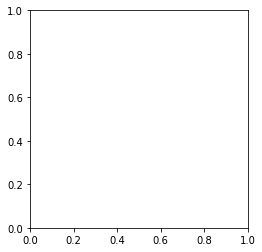

In [61]:
>>> train_images.shape
(60000, 28, 28)
>>> train_labels
np.array([5, 0, 4, ..., 5, 6, 8])
>>> test_images.shape
(10000, 28, 28)
>>> plt.imshow(train_images[0], cmap="Greys")


In [45]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))


In [46]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])


In [47]:
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255.0
test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0


In [48]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)


In [49]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0159 - accuracy: 0.9161
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0063 - accuracy: 0.9653
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0045 - accuracy: 0.9766
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0034 - accuracy: 0.9824
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0028 - accuracy: 0.9860


In [50]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

313/313 [==============================] - 0s 678us/step - loss: 0.0036 - accuracy: 0.9803
테스트 정확도: 0.9803000092506409


Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0023 - accuracy: 0.9886
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0019 - accuracy: 0.9903
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0016 - accuracy: 0.9917
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0014 - accuracy: 0.9930
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0012 - accuracy: 0.9940


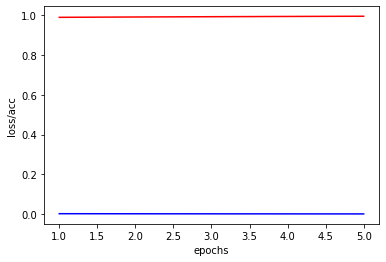

In [51]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()


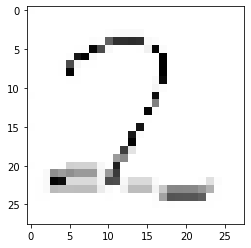

In [62]:
import cv2 as cv
image = cv.imread('test.png', cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))
image = image.astype('float32')
image = image.reshape(1, 784)
image = 255-image
image /= 255.0
plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()


In [63]:
pred = model.predict(image.reshape(1, 784), batch_size=1)
print("추정된 숫자=", pred.argmax())

추정된 숫자= 2
